# Competição Kaggle - Titanic

Nesse notebook mostra o passo a passo do que foi feito por mim nessa competição tão conhecida da Kaggle.

O objetivo dessa competição é usar algum(ns) modelo(s) de Machine Learning e prever se um grupos de passageiros irá ou não sobreviver ao naufrágio do Titanic que ocorreu em 15 de abril de 1912, durante sua viagem inaugural. Era um navio considerado impossível de afundar, que gerou até a mitológica frase "Nem Deus afunda esse navio" atribuída a empresa construtora do navio e a seu engenheiro, porém falsa.

Dos 2224 passageiros do Titanic, apenas 722 sobreviveram a tragédia.

**Dados**

Foram disponibilizados dois conjunto de dados: **train.csv** (treino) e **test.csv** (teste).

O **train.csv** será usado para treinar o modelo e o **test.csv** para gerar as previsões.

Com exceção de Survived, ambos os conjuntos de dados possuem os mesmos nomes de variáveis, que são:

**1)** Survived (Ou Sobrevivência): que está preenchido com 1 (sobreviveu) ou 0 (não sobreviveu)

**2)** Pclass(ou Classe de ingresso): que está preenchido com 1 (1ª classe),2 (2ª classe) ou 3 (3ª classe)

**3)** Sex (ou Sexo): male (masculino) e female (feminino)

**4)** Age (ou idade): idade dos passageiros

**5)** Sibsp: Nº de irmãos / cônjuges a bordo do Titanic

**6)** Parch: Nº de pais / filhos a bordo do Titanic

**7)** Ticket: Número do bilhete

**8)** Fare: Valor da tarifa de embarque

**9)** Cabin: Cabine dos passageiros

**10)** Emabrked: de que porto o passageiro embarcou no Titanic (C = Cherbourg, Q = Queenstown, S = Southampton)

Os dados podem ser obtidos [aqui](https://www.kaggle.com/c/titanic/data)

# Importação das bibliotecas e dos dados

In [1]:
#Importando as bibliotecas que serão usadas para análise e tratamento do dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando as bases de dados

train=pd.read_csv('train_tit.csv')
test=pd.read_csv('test_tit.csv')

# Análise exploratória e Tratamento do dados

In [3]:
#Visualizando as bases de dados de treino

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Visualizando a base de dados de teste

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Visualizando as colunas

train.columns.values, test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [6]:
#Aqui podemos vos tipos de dados de cada colunas dos datasets de treino e de teste

train.info()

print('_'*40)

test.info()

# As variáveis numéricas são PassengerId,Survived, Pclass,Age,Sibsp,Parch,Fare
    #Varnum Ok: Survived,Pclass, Sibsp, Parch

    #Varnum nok:Age, Fare (criar uma faixa)

#Variáveis não numéricas: Name,Sex,Ticket,Cabin

    #ver se tem algo em Name
    #transformar Sex em categórica numérica
    #requerem tratamento para serem transformadas em categóricas numéricas para serem usadas no(s) algoritmo(s).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
#Estastísticas descritivas de cada coluna do dataset de treino

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Estatísticas descritivas do dataset de teste

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.isna().sum() ,test.isna().sum()

#Visualização dos valores faltantes nas bases de treino e teste

#podemos ver que na base de treino há valores faltantes na coluna Age, Cabin e Embarked
#e na base de teste, nas colunas Age e Cabin.

#podemos ver que a coluna Cabin possui muitos valores faltantes em ambas as colunas, por esse motivo essa coluna será excluída
# Na coluna Age iremos fazer um processo de imputação, onde substituiremos os valores faltantes pela média da coluna idade
# na coluna Embarked, também faremos um processo de imputação, mas substituiremos os valores faltantes pelos valores mais fre-
# quentes

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

# Análise e tratamento da coluna Pclass

In [10]:
#Aqui podemos um percentual de sobreviventes por classe (1 - primeira classe, 2 -segunda classe, 3-terceira classe)
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#Da classe 1, em média, aproximadamente 63% sobreviveram
#Da classe 2, em média, aproximadamente 47% sobreviveram
#Da classe 3, em média, aproximadamente 24% sobreviveram

#podemos ver que classes de maior nível tem uma taxa de sobrevivência maior

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


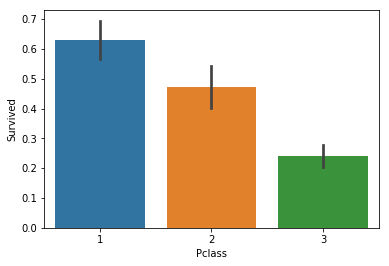

In [11]:
#Aqui podemos ver visualmente a informação superior
sns.barplot(x="Pclass", y="Survived", data=train)

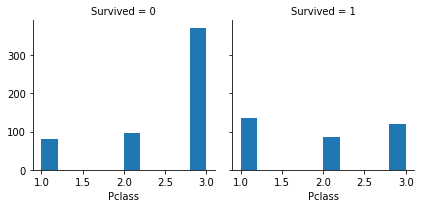

In [12]:
#Aqui vamos separar entre não sobrecviventes (0) e sobreviventes (1)

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Pclass',bins=10)

#podemos ver que entre os que não sobreviveram, os da terceira classe foram de maior número
#entre os que sobreviveram, número estão bem próximos

# Análise e tratamento da coluna Sex

In [13]:
#Agora vamos substituir o que está em string por números

#female será substituído por 0
#male será substituído por 1

train['Sex'].replace("female",0,inplace=True)
train['Sex'].replace("male",1,inplace=True)

In [14]:
#Vemos agora que entre as mulheres a sobrevivência foi maior que dos homens
#quase 3/4 das mulheres sobreviveram enquanto menos de 1/5 dos homens sobreviveram

#Provavelmente por conta de regra "Mulheres e crianças primeiro" (ou em menor grau, o Birkenhead Drill[1][2]) 
#é um código de conduta datando de 1852, pelo qual as vidas de mulheres e crianças deveriam ser salvas primeiro 
#em uma situação que ameaça a vida, geralmente abandonando o navio, quando os recursos de sobrevivência,
#como botes salva-vidas são limitados.

train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [15]:
#Faremos o mesmo procedimento para o dataset de teste

test['Sex'].replace("female",0,inplace=True)
test['Sex'].replace("male",1,inplace=True)

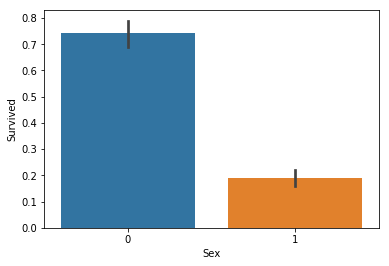

In [16]:
#Vemos graficamente o que já visualizamos em números anteriormente, entre homens e mulheres,
#mulheres tiveram uma taxa de sobrevivência maior

sns.barplot(x="Sex", y="Survived", data=train)

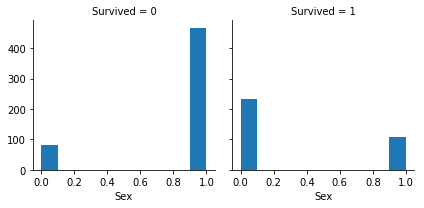

In [17]:
#Aqui, segregando ainda mais, podemos ver que, entre os não sobrevivente o número é majortariamente de homens
#entre os sobreviventes, mulheres

h = sns.FacetGrid(train, col='Survived')
h.map(plt.hist, 'Sex',bins=10)

# Análise tratamento da coluna Embarked

In [18]:
#Agora vamos para a fetaure Embarked

#os códigos C,Q,S, referem-se ao porto de embarque de cada tripulante do Titanic
#C refere-se a Cherbourg, Q a Queenstown e S a Southampton

#Vamos substituir por valores numéricos
train['Embarked'].replace("C",0,inplace=True)
train['Embarked'].replace("Q",1,inplace=True)
train['Embarked'].replace("S",2,inplace=True)

In [19]:
#Faremos o mesmo para o dataset de teste

test['Embarked'].replace("C",0,inplace=True)
test['Embarked'].replace("Q",1,inplace=True)
test['Embarked'].replace("S",2,inplace=True)

In [20]:
#Na tabela abaixo podemos ver que embarques do porto de Cherbourg teve uma taxa de sobrevivência de mais de 55%,
#quem embarcou do porto de Queenstown, quase 39% e quem embarcou de Southampton 33%

train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,0.0,0.553571
1,1.0,0.389610
2,2.0,0.336957


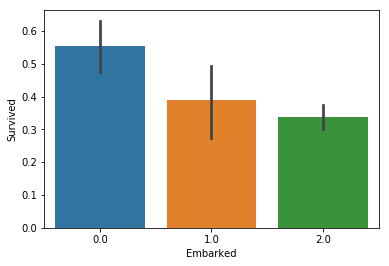

In [21]:
#Aqui podemos conferir graficamente esses resultados

sns.barplot(x="Embarked", y="Survived", data=train)

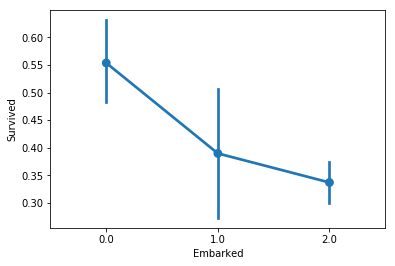

In [22]:
#Visualizando em outro gráfico

sns.pointplot(x="Embarked", y="Survived", data=train)

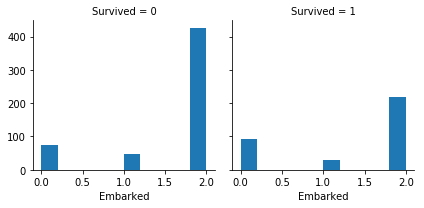

In [23]:
#Aqui nesses 2 gráficos abaixo podemos ver embarques de Southampton tiveram uma alta taxa de mortes, mas curioso que entre os 
#sobreviventes, também a taxa foi alta. As classes 1 e 2 foram as que menos tiveram mortes.

h = sns.FacetGrid(train, col='Survived')
h.map(plt.hist, 'Embarked',bins=10)

In [24]:
#Tratamento final de Embarked: Para Embarked substituiremos pela valor que mais se repete (a moda)

mais_freq=train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mais_freq,inplace=True)

In [25]:
#E agora transformaremos os valores em inteiros

train['Embarked']=train['Embarked'].astype(int)

# Análise e tratamento da coluna SibSp

In [26]:
#Variável SibSp que refere-se a número de irmão/conjugês abordo

train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#Podemos ver que a sobrevivência foi maior para o qual o número de irmãos/conjugês são menores (1,2,0)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


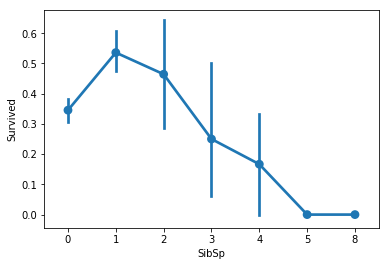

In [27]:
#Observando graficamente o resultado anterior, que para 0, 1 e 2 a sobrevivência foi maior
sns.pointplot(x="SibSp", y="Survived", data=train)

# Análise e tratamento de coluna Parch

In [28]:
#Para a variável Parch, que trata do número de pais/crianças a bordo, a sobrevivência é 
#maior para números menores dessa variável

train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


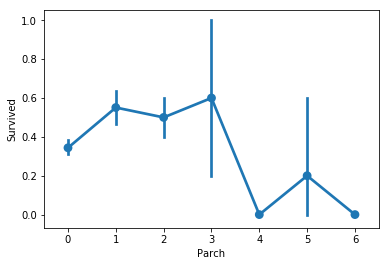

In [29]:
#Graficamente, a medida que essa variável vai aumentando a taxa de sobrevivência também aumenta, 
#até o valor 4, em que há uma queda

sns.pointplot(x="Parch", y="Survived", data=train)

# Criação da Feature artificial Family e Alone

In [30]:
#Tendo em vista que temos o número de pais/crianças e de irmãos/conjûgês, podemos criar uma variável chamada de família que será
#a soma entre SibSp e Parch

#colocamos +1, pois acaba surgindo família com 0 componentes, que não faz sentido

train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

In [31]:
#Mesmo comportamento apresentado anteriormente é observado

train[['Family','Survived']].groupby(['Family'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


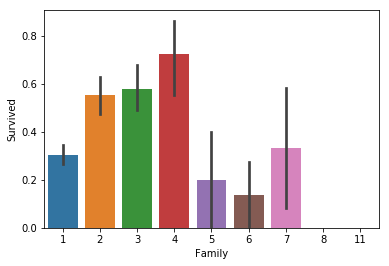

In [32]:
#Resultado gráfico, a medida que o número de membros aumenta, até certo valor, a sobrevivência também aumenta

sns.barplot(x="Family", y="Survived", data=train)

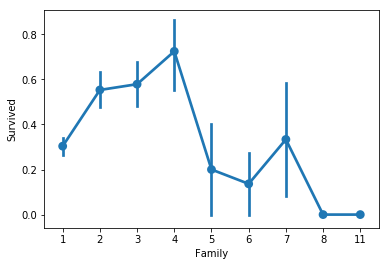

In [33]:
sns.pointplot(x="Family", y="Survived", data=train)

In [34]:
#Um questionamento que podemos fazer é: será que indivíduos que estão sozinho tem uma taxa de sobrevivência maior ou menor ?

#com o loop abaixo irei fazer a seguinte substituição
#para valor na variável Family, se foi igual a 1 (ou seja, alguém que embarcou sozinho) ele substituirá o valor por 1,
#caso contrário ele substiturá por zero (ou seja, não está sozinho) e substituirei Family por Alone (sozinho)
for i in train['Family']:
    if i==1:
        train['Family'].replace(i,1,inplace=True)
    else:
        train['Family'].replace(i,0,inplace=True)

In [35]:
#farei o mesmo para o dataset de teste

for i in test['Family']:
    if i==1:
        test['Family'].replace(i,1,inplace=True)
    else:
        test['Family'].replace(i,0,inplace=True)

In [36]:
#criaremos a variável Alone em ambos os datasets

train['Alone']=train['Family']
test['Alone']=test['Family']

In [37]:
#Agora vamos excluir as variáveis que não nos interessam

#excluiremos Ticket por ter muitos valores duplicados
#Cabin possui muitos valores nulos
#Family é o mesmo que Alone
#PassengerId não nos traz informações relevantes

#Assim sendo

train=train.drop(['PassengerId','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [38]:
#novo dataset de treino

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1


In [39]:
#novo dataset de test

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,0,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,1,1
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,0,0


In [40]:
#Vemos que temos agora as variáveis Pclass, Sex, SibSp, Parch, Embarked e Alone como categóricas e numéricas
#Falta agora tratarmos as variáveis Name, Age e Fare

# Tratamento da coluna Name e criação da feature title

In [41]:
#Vamos para a variável Name

#Observando Name, podemos nos questionar, o que podemos extrair dessa coluna ?

train['Name'].head(10)

#Abaixo podemos ver algo interessante: os nomes possuem títulos (Mr., Miss, Master, Mrs)

#podemos extrair essa informação e criar uma nova variável

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [42]:
#Usamos o método split com o apply e extrairemos esses títulos de cada nome

#extraimos o que vem depois da vírgula em name até o ponto

train['title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [43]:
#Faremos o mesmo para test

test['title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [44]:
#podemos ver que há títulos que são únicos

train['title'].value_counts()

#Vamos entender cada um desse títulos:

#Mr é o título dados a homens
#Miss é dado a mulheres solteiras
#Mrs é dado a mulheres casadas
#Master é dado para meninos e jovens
#Dr (Doctor ou Doutor) é um título acadêmico
#Rev (Reverendo) é um título dado a clérigos
#Mlle (Mademoiselle) é um título francês dado a mulheres solteiras
#Major é um título militar
#Col (Coronel) é um título militar
#Sir é título dado para homens, pela coroa Britânica
#Ms dados a mulheres quando o estado civil é desconhecido
#Mme (madame) é dado a mulheres
#the Countess (condessa) é um título de nobreza
#Jonkheer é título que denota a classificação mais baixa dentro da nobreza
#Lady é um título de nobreza
#Capt (Capitão), refere-se ao capitão do navio
#Don (Dom) é um título de nobreza

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Jonkheer          1
Sir               1
Lady              1
Mme               1
Ms                1
Capt              1
Don               1
Name: title, dtype: int64

In [45]:
test['title'].value_counts()

#Em teste teremos de diferente Dona (feminino de Dom)

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: title, dtype: int64

In [46]:
train['title'].nunique()

#São um total de 17 títulos únicos

17

In [47]:
#Vamos então fazer uma conversão:

#Vamos agrupar título que se referem a homens, mulheres, mulheres não casadas, crianças e títulos raros.
#De 17 classes, teremos, apenas, 5 classes apenas.

#Mr

#Ms , Miss e Mlle

#Mme e Mrs

#Master

#Dr, Rev, Major, Col, Sir, the Countess, Jonkheer, Lady, Capt, Don e Dona

#Faremos doi replaces, um para substituir e termos apenas um título por classe e outro para substituirmos por valore
#numpericos

In [48]:
#primeiro Replace no dataset de treino

train['title'].replace("Ms","Miss",inplace=True)
train['title'].replace("Mlle","Miss",inplace=True)

train['title'].replace("Mme","Mrs",inplace=True)

train['title'].replace("Dr","Rare",inplace=True)
train['title'].replace("Rev","Rare",inplace=True)
train['title'].replace("Col","Rare",inplace=True)
train['title'].replace("Major","Rare",inplace=True)
train['title'].replace("Sir","Rare",inplace=True)
train['title'].replace("the Countess","Rare",inplace=True)
train['title'].replace("Jonkheer","Rare",inplace=True)
train['title'].replace("Lady","Rare",inplace=True)
train['title'].replace("Capt","Rare",inplace=True)
train['title'].replace("Don","Rare",inplace=True)

In [49]:
#primeiro replace no dataset de teste

test['title'].replace("Ms","Miss",inplace=True)

test['title'].replace(["Col","Rev","Dona","Dr"],"Rare",inplace=True)

In [50]:
#Vemos que agora temos 5 títulos

train['title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: title, dtype: int64

In [51]:
#Assim como na base de teste

test['title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: title, dtype: int64

In [52]:
#Agora faremos o segundo replace

train['title'].replace("Mr",0,inplace=True)
train['title'].replace("Miss",1,inplace=True)
train['title'].replace("Mrs",2,inplace=True)
train['title'].replace("Master",3,inplace=True)
train['title'].replace("Rare",4,inplace=True)

test['title'].replace("Mr",0,inplace=True)
test['title'].replace("Miss",1,inplace=True)
test['title'].replace("Mrs",2,inplace=True)
test['title'].replace("Master",3,inplace=True)
test['title'].replace("Rare",4,inplace=True)

In [53]:
#Vemos que agora temos variáveis categóricas e numéricas

train['title'].value_counts(),test['title'].value_counts()

(0    517
 1    185
 2    126
 3     40
 4     23
 Name: title, dtype: int64, 0    240
 1     79
 2     72
 3     21
 4      6
 Name: title, dtype: int64)

In [54]:
train[['title','Survived']].groupby(['title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#Aqui podemos ver que mulheres casadas(2), mulheres solteiras(1) e crianças(3), tem sobrevivência maiores

,title,Survived
2,2,0.793651
1,1,0.702703
3,3,0.575000
4,4,0.347826
0,0,0.156673


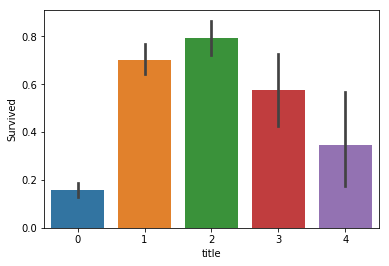

In [55]:
sns.barplot(x="title", y="Survived", data=train)

#Observemos visualmente nos gráficos seguintes

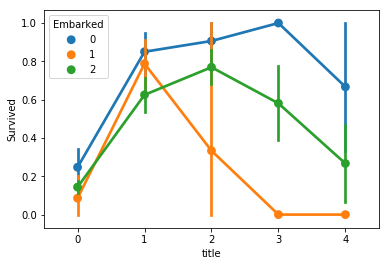

In [56]:
sns.pointplot(x="title", y="Survived", hue="Embarked",data=train)

#Aqui a sobrevivência por título e por porto de embarque

#As mMulheres solteiras que embarcaram no porto de Cherbourg tiveram uma taxa de sobrevivência maior.

In [57]:
# Vamos agora excluir Name

train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

# Tratamento da coluna Age

In [58]:
train.isna().sum()

#Ainda temos que tratar os dados faltantes em Age e Embarked

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Family        0
Alone         0
title         0
dtype: int64

In [59]:
#Para Age optei por imputar os dados pela média

train['Age'].fillna(train['Age'].median(),inplace=True)

In [60]:
#e transformaremos os dados em int

train['Age']=train['Age'].astype(int)

In [61]:
#faremos o mesmo para test

test['Age'].fillna(test['Age'].median(),inplace=True)
test['Age']=test['Age'].astype(int)

In [62]:
#Ainda há um problema, do jeito que Age está ainda não está bom para o treino algoritmo
#vamos fazer o seguinte, transformaremos a idade em uma variável categórica

#mas antes vamos usar o pd.cut() e criar faixas de idades

train['Faixa_age']=pd.cut(train['Age'], 5)

#estamos criando 5 faixas de idade

#Abaixo podemos ver que foram criadas faixa em que as idade se encontram

train[['Age','Faixa_age']].head(10)

,Age,Faixa_age
0,22,"(16.0, 32.0]"
1,38,"(32.0, 48.0]"
2,26,"(16.0, 32.0]"
3,35,"(32.0, 48.0]"
4,35,"(32.0, 48.0]"
5,28,"(16.0, 32.0]"
6,54,"(48.0, 64.0]"
7,2,"(-0.08, 16.0]"
8,27,"(16.0, 32.0]"
9,14,"(-0.08, 16.0]"


In [63]:
train['Faixa_age'].value_counts(ascending=False)

#Vamos que abaixo de 16 anos tem 100 pessoas
#entre 16 e 32, 525 pessoas
#entre 32 e 48, 186 pessoas
#entre 48 e 64, 69 pessoas
# e entre 64 a 80, 11 pessoas

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Faixa_age, dtype: int64

In [64]:
train[['Faixa_age','Survived']].groupby(['Faixa_age'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#Aqui podemos ver Sobrevivência por faixa etária. Apenas os menores de 16 anos tiveram uma faixa superior a 50%.

,Faixa_age,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.344762
4,"(64.0, 80.0]",0.090909


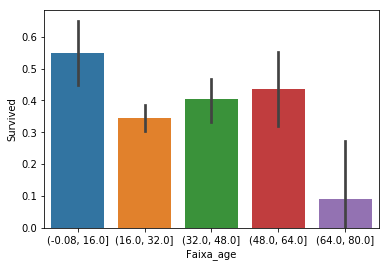

In [65]:
sns.barplot(x="Faixa_age", y="Survived", data=train)

#Resultado anterior visualmente

In [66]:
#Vamos fazer o mesmo para o dataset test

test['Faixa_age']=pd.cut(test['Age'], 5)

In [67]:
#Para transformamos a ideade de dado numérico para uma ariável categórica numérica iremos, primeiro
#criar uma lista em que estarão os dados de treino e de teste

treino_teste=[train,test]

In [68]:
#Vamos fazer um laço. Nesse laço se o valor da coluna Age estiver abaixo de 16, os valores serão substituídos por 0
#valores entre maiores de 16 e menores iguais 32, serão substituídos por 1
#valores entre maiores de 32 e menores iguais 48, serão substituídos por 2
#valores entre maiores de 48 e menores iguais 64, serão substituídos por 3
#valores entre maiores que 64, serão substituídos por 4

#isso será feito para ambos os datasets

for dados in treino_teste:    
    dados.loc[ dados['Age'] <= 16, 'Age'] = 0
    dados.loc[(dados['Age'] > 16) & (dados['Age'] <= 32), 'Age'] = 1
    dados.loc[(dados['Age'] > 32) & (dados['Age'] <= 48), 'Age'] = 2
    dados.loc[(dados['Age'] > 48) & (dados['Age'] <= 64), 'Age'] = 3
    dados.loc[ dados['Age'] > 64, 'Age']=4

In [69]:
train['Age'].value_counts()

#Aqui vemos o mesmo resultado de quando agrupamos pela variável Faixa_age

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

In [70]:
#podemos excluir a coluna Faixa_age

train=train.drop('Faixa_age',axis=1)

In [71]:
train.info()

print('_'*40)

test.info()

#Vemos que ainda temos uma variável float, o que não é bom na hora de treinarmos nosso algoritmo
#Falta tratarmos essa coluna

#Faremos o mesmo procedimento que fizemos na coluna Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
Family      891 non-null int64
Alone       891 non-null int64
title       891 non-null int64
dtypes: float64(1), int32(2), int64(8)
memory usage: 69.7 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null int32
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         417 non-null float64
Embarked     418 non-null int64
Family       418 non-null int64
Alone        418 non-null int64
title        418 non-null int64
Faixa_age    418 non-nu

# Análise tratamento da coluna Fare

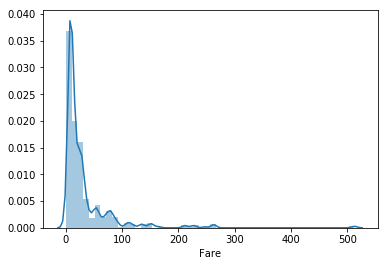

In [72]:
sns.distplot(train['Fare'], hist=True, rug=False)

#Vamos visualizar a distribuição da coluna Fare

In [73]:
#Primeiro criar as faixas
pd.cut(train['Fare'],4)

#Podemos ver que usando pd.cut o resultado fica igual para qualquer que seja o valore com um ntervalo muito grande
#diferente do que aconteceu quando usamos o pd.cut anteriormente em idade

#Por esse motivo usaremos pd.qcut

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
886    (-0.512, 128.082]
887    (-0.512, 128.082]
888    (-0.512, 128.082]
889    (-0.512, 128.082]
890    (-0.512, 128.082]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [74]:
pd.qcut(train['Fare'],4)

#Usando pd.qcut vemos que os intervalos são diferentes para cara valor de passagem (Fare) e mais coerente com o que queremos

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [75]:
#Vamos criar uma variável chamada Faixa_Fare

train['Faixa_Fare']=pd.qcut(train['Fare'],4)

In [76]:
train[['Faixa_Fare','Survived']].groupby(['Faixa_Fare'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#Note algo interessante aqui: A medida que o valor do Ticket vai aumentando para faixas de valores maiores a taxa de
#Sobrevivência é maior

,Faixa_Fare,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


(<matplotlib.axes._subplots.AxesSubplot at 0x27273408710>,)

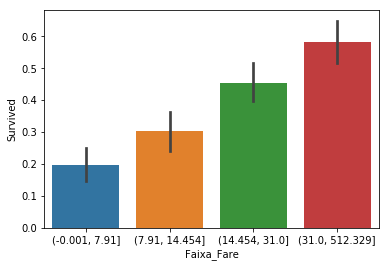

In [77]:
sns.barplot(x="Faixa_Fare", y="Survived", data=train),

#Visualizando graficamente

In [78]:
#Vamos definir novamente quem é treino_teste
treino_teste=[train,test]

#Faremos o mesmo que fizemos para Age, porém modificando os valores
for dados in treino_teste:    
    dados.loc[ dados['Fare'] <= 7.91, 'Fare'] = 0
    dados.loc[(dados['Fare'] > 7.91) & (dados['Fare'] <= 14.454), 'Fare'] = 1
    dados.loc[(dados['Fare'] > 14.454) & (dados['Fare'] <= 31), 'Fare'] = 2
    dados.loc[ dados['Fare'] > 31, 'Fare']=3

In [79]:
#Transformaremos Fare em int

train['Fare']=train['Fare'].astype(int)

In [80]:
#E por fim, excluiremos Faixa_Fare de train

train=train.drop('Faixa_Fare',axis=1)

In [81]:
test=test.drop('Faixa_age',axis=1)

In [82]:
#Vamos visualizar os datasets

from IPython.display import display
display(train.head())
display(test.head())

#Temos agora todas as colunas tratadas e transformadas em categóricas numéricas

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,0,3,1,1,1,0,0,2,0,0,0
1,1,1,0,2,1,0,3,0,0,0,2
2,1,3,0,1,0,0,1,2,1,1,1
3,1,1,0,2,1,0,3,2,0,0,2
4,0,3,1,2,0,0,1,2,1,1,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,3,1,2,0,0,0.0,1,1,1,0
1,3,0,2,1,0,0.0,2,0,0,2
2,2,1,3,0,0,1.0,1,1,1,0
3,3,1,1,0,0,1.0,2,1,1,0
4,3,0,1,1,1,1.0,2,0,0,2


In [83]:
#Ops, faltou imputar o valor faltante em Fare de test e transformá-la em int

mais_freqt=test['Fare'].dropna().mode()[0]
test['Fare'].fillna(mais_freqt,inplace=True)
test['Fare']=test['Fare'].astype(int)

# Resultado do tratamento

In [84]:
display(train.head())
display(test.head())

#Novamente

#Temos então todas colunas tratadas para serem usadas no modelo de Machine Learning

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,0,3,1,1,1,0,0,2,0,0,0
1,1,1,0,2,1,0,3,0,0,0,2
2,1,3,0,1,0,0,1,2,1,1,1
3,1,1,0,2,1,0,3,2,0,0,2
4,0,3,1,2,0,0,1,2,1,1,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,title
0,3,1,2,0,0,0,1,1,1,0
1,3,0,2,1,0,0,2,0,0,2
2,2,1,3,0,0,1,1,1,1,0
3,3,1,1,0,0,1,2,1,1,0
4,3,0,1,1,1,1,2,0,0,2


# Separando dados de treino e teste

In [85]:
#Vamos separar os dados de treino entre classe e features

classe=train['Survived']

treino=train.drop('Survived',axis=1)

In [86]:
#Vamos ver o shape de cada dataset

print(treino.shape, test.shape, classe.shape)

(891, 10) (418, 10) (891,)


# Aplicando o modelo de Machine Learning (Cat Boost)

In [87]:
#Vamos usar um modelo de Machine Learning chamado de Catboost

#Importando o modelo
from catboost import CatBoostClassifier

#instanciando o modelo
cbt= CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', 
                           eval_metric='AUC',use_best_model=False, random_seed=42)

#Treinando o modelo

cbt.fit(treino,classe)

#Uma vez treinado o modelo vamos criar as previsões

pred = cbt.predict(test)
pred

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred

test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#Antes eu estava na posição 16963 com um resultado de 0.74162. Não havia aplicado o devido tratamento para as colunas Age e Fare
#Após transformá-las em categóricas numéricas o meu resultado na competição do Titanic foi 0.78468 e subi 11.511 posições
#Cheguei na posição 5452.


0:	total: 300ms	remaining: 7m 29s
1:	total: 304ms	remaining: 3m 47s
2:	total: 308ms	remaining: 2m 33s
3:	total: 311ms	remaining: 1m 56s
4:	total: 314ms	remaining: 1m 33s
5:	total: 317ms	remaining: 1m 19s
6:	total: 321ms	remaining: 1m 8s
7:	total: 324ms	remaining: 1m
8:	total: 328ms	remaining: 54.3s
9:	total: 330ms	remaining: 49.1s
10:	total: 332ms	remaining: 44.9s
11:	total: 334ms	remaining: 41.4s
12:	total: 336ms	remaining: 38.4s
13:	total: 338ms	remaining: 35.9s
14:	total: 341ms	remaining: 33.7s
15:	total: 345ms	remaining: 32s
16:	total: 349ms	remaining: 30.5s
17:	total: 353ms	remaining: 29.1s
18:	total: 356ms	remaining: 27.8s
19:	total: 360ms	remaining: 26.6s
20:	total: 363ms	remaining: 25.5s
21:	total: 366ms	remaining: 24.6s
22:	total: 370ms	remaining: 23.8s
23:	total: 374ms	remaining: 23s
24:	total: 379ms	remaining: 22.4s
25:	total: 382ms	remaining: 21.7s
26:	total: 385ms	remaining: 21s
27:	total: 387ms	remaining: 20.4s
28:	total: 389ms	remaining: 19.8s
29:	total: 392ms	remaining:

314:	total: 926ms	remaining: 3.48s
315:	total: 928ms	remaining: 3.48s
316:	total: 930ms	remaining: 3.47s
317:	total: 931ms	remaining: 3.46s
318:	total: 932ms	remaining: 3.45s
319:	total: 933ms	remaining: 3.44s
320:	total: 934ms	remaining: 3.43s
321:	total: 936ms	remaining: 3.42s
322:	total: 937ms	remaining: 3.42s
323:	total: 939ms	remaining: 3.41s
324:	total: 940ms	remaining: 3.4s
325:	total: 942ms	remaining: 3.39s
326:	total: 943ms	remaining: 3.38s
327:	total: 945ms	remaining: 3.38s
328:	total: 947ms	remaining: 3.37s
329:	total: 949ms	remaining: 3.36s
330:	total: 950ms	remaining: 3.36s
331:	total: 952ms	remaining: 3.35s
332:	total: 954ms	remaining: 3.34s
333:	total: 957ms	remaining: 3.34s
334:	total: 959ms	remaining: 3.33s
335:	total: 962ms	remaining: 3.33s
336:	total: 964ms	remaining: 3.33s
337:	total: 967ms	remaining: 3.32s
338:	total: 969ms	remaining: 3.32s
339:	total: 972ms	remaining: 3.31s
340:	total: 974ms	remaining: 3.31s
341:	total: 976ms	remaining: 3.31s
342:	total: 978ms	rem

631:	total: 1.56s	remaining: 2.15s
632:	total: 1.56s	remaining: 2.14s
633:	total: 1.56s	remaining: 2.14s
634:	total: 1.57s	remaining: 2.13s
635:	total: 1.57s	remaining: 2.13s
636:	total: 1.57s	remaining: 2.13s
637:	total: 1.57s	remaining: 2.12s
638:	total: 1.57s	remaining: 2.12s
639:	total: 1.57s	remaining: 2.12s
640:	total: 1.58s	remaining: 2.11s
641:	total: 1.58s	remaining: 2.11s
642:	total: 1.58s	remaining: 2.1s
643:	total: 1.58s	remaining: 2.1s
644:	total: 1.58s	remaining: 2.1s
645:	total: 1.58s	remaining: 2.09s
646:	total: 1.59s	remaining: 2.09s
647:	total: 1.59s	remaining: 2.09s
648:	total: 1.59s	remaining: 2.08s
649:	total: 1.59s	remaining: 2.08s
650:	total: 1.59s	remaining: 2.08s
651:	total: 1.59s	remaining: 2.08s
652:	total: 1.6s	remaining: 2.07s
653:	total: 1.6s	remaining: 2.07s
654:	total: 1.6s	remaining: 2.07s
655:	total: 1.6s	remaining: 2.06s
656:	total: 1.61s	remaining: 2.06s
657:	total: 1.61s	remaining: 2.06s
658:	total: 1.61s	remaining: 2.06s
659:	total: 1.61s	remaining

928:	total: 2.2s	remaining: 1.35s
929:	total: 2.21s	remaining: 1.35s
930:	total: 2.21s	remaining: 1.35s
931:	total: 2.21s	remaining: 1.35s
932:	total: 2.21s	remaining: 1.34s
933:	total: 2.21s	remaining: 1.34s
934:	total: 2.22s	remaining: 1.34s
935:	total: 2.22s	remaining: 1.34s
936:	total: 2.22s	remaining: 1.33s
937:	total: 2.22s	remaining: 1.33s
938:	total: 2.22s	remaining: 1.33s
939:	total: 2.23s	remaining: 1.33s
940:	total: 2.23s	remaining: 1.32s
941:	total: 2.23s	remaining: 1.32s
942:	total: 2.23s	remaining: 1.32s
943:	total: 2.23s	remaining: 1.32s
944:	total: 2.24s	remaining: 1.31s
945:	total: 2.24s	remaining: 1.31s
946:	total: 2.24s	remaining: 1.31s
947:	total: 2.24s	remaining: 1.3s
948:	total: 2.24s	remaining: 1.3s
949:	total: 2.25s	remaining: 1.3s
950:	total: 2.25s	remaining: 1.3s
951:	total: 2.25s	remaining: 1.29s
952:	total: 2.25s	remaining: 1.29s
953:	total: 2.25s	remaining: 1.29s
954:	total: 2.25s	remaining: 1.29s
955:	total: 2.26s	remaining: 1.28s
956:	total: 2.26s	remaini

1225:	total: 2.85s	remaining: 638ms
1226:	total: 2.85s	remaining: 635ms
1227:	total: 2.86s	remaining: 633ms
1228:	total: 2.86s	remaining: 630ms
1229:	total: 2.86s	remaining: 628ms
1230:	total: 2.86s	remaining: 625ms
1231:	total: 2.86s	remaining: 623ms
1232:	total: 2.87s	remaining: 621ms
1233:	total: 2.87s	remaining: 618ms
1234:	total: 2.87s	remaining: 616ms
1235:	total: 2.87s	remaining: 613ms
1236:	total: 2.87s	remaining: 611ms
1237:	total: 2.88s	remaining: 609ms
1238:	total: 2.88s	remaining: 606ms
1239:	total: 2.88s	remaining: 604ms
1240:	total: 2.88s	remaining: 601ms
1241:	total: 2.88s	remaining: 599ms
1242:	total: 2.88s	remaining: 597ms
1243:	total: 2.89s	remaining: 594ms
1244:	total: 2.89s	remaining: 592ms
1245:	total: 2.89s	remaining: 590ms
1246:	total: 2.89s	remaining: 587ms
1247:	total: 2.9s	remaining: 585ms
1248:	total: 2.9s	remaining: 583ms
1249:	total: 2.9s	remaining: 580ms
1250:	total: 2.9s	remaining: 578ms
1251:	total: 2.91s	remaining: 576ms
1252:	total: 2.91s	remaining: 57

1496:	total: 3.5s	remaining: 7.01ms
1497:	total: 3.5s	remaining: 4.67ms
1498:	total: 3.5s	remaining: 2.33ms
1499:	total: 3.5s	remaining: 0us


# Processo de seleção de features

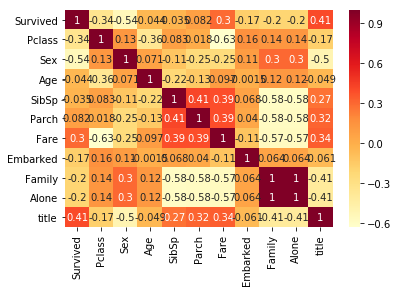

In [88]:
#Podemos deixar nosso modelo mais simples e selecionar apenas as features melhores para o modelo

#Podemos usar a correlação

%matplotlib inline
correlacao=train.corr()
sns.heatmap(correlacao, annot = True, cmap = "YlOrRd")

#Usando correlação e definindo de forma arbitrária a seleção de 4 features, selecionaríamos as features:
# Pclass, Sex, Fare e Title
#são mais correlacionadas com Survived

In [89]:
#Podemos usar outro método: o Chi2

#Esse método é melhor que usar o de correlação, pois correlação é melhor quando temos um problema de regressão

#O método chi2 é melhor quando temos features categóricas numéricas e a classe a ser classificada também categórica numérica, 
#que é justamente o nosso caso.

#Importando os módulos da Scikit-learn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [90]:
#Instanciando e definindo arbitrariamente 4 features para serem selecionadas

chi=SelectKBest(chi2,k=4)

In [91]:
#fazendo o treinamento para seleção de feautures

fit=chi.fit(treino,classe)

In [92]:
#Aqui abaixo podemos ver as features que foram escolhidas por esse métodos

#As features de índices 0,1,5,9

fit.get_support(indices=True)

array([0, 1, 5, 9], dtype=int64)

In [93]:
#Vamos guardar isso em uma variável e imprimir

features=fit.transform(treino)
print(features)

[[3 1 0 0]
 [1 0 3 2]
 [3 0 1 1]
 ...
 [3 0 2 1]
 [1 1 2 0]
 [3 1 0 0]]


In [94]:
#Vamos ver quais as features escolhidas

#Pclass, Sex, Fare, Title, justamente as que foram selecionadas por meio de correlação de features
cols=fit.get_support(indices=True)
treino.iloc[:,cols]

,Pclass,Sex,Fare,title
0,3,1,0,0
1,1,0,3,2
2,3,0,1,1
3,1,0,3,2
4,3,1,1,0
5,3,1,1,0
6,1,1,3,0
7,3,1,2,3
8,3,0,1,2
9,2,0,2,2


In [95]:
#Vamos criar um novo dataset apenas com essas variáveis

treino2=treino[['Pclass','Sex','Fare','title']]
treino2.head()

,Pclass,Sex,Fare,title
0,3,1,0,0
1,1,0,3,2
2,3,0,1,1
3,1,0,3,2
4,3,1,1,0


# Aplicando novamente o Cat Boost ($Chi^{2}$)

In [96]:
#instanciando o modelo
cbt2= CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', 
                           eval_metric='AUC',use_best_model=False, random_seed=42)

#Treinando o modelo

cbt2.fit(treino2,classe)

#Gerando as previões
testa2=test[['Pclass','Sex','Fare','title']]

pred2 = cbt2.predict(testa2)
pred2

#criando arquivo csv

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred2
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

# modelo foi para 0.79904 e subi 3,442 posições para posição 2010 (no momento da submissão)
#O que me estar entre no top 11% da competição da kaggle.

#Ou seja, após o processo de seleção de features o modelo teve uma melhora de desempenho, ao invés de usar 8 features
#selecionei 4 features e o nível de acerto do modelo subiu 1 ponto percentual.

0:	total: 2.5ms	remaining: 3.75s
1:	total: 6.75ms	remaining: 5.06s
2:	total: 12.1ms	remaining: 6.02s
3:	total: 14.7ms	remaining: 5.49s
4:	total: 18.1ms	remaining: 5.42s
5:	total: 20.2ms	remaining: 5.04s
6:	total: 23.7ms	remaining: 5.05s
7:	total: 26.6ms	remaining: 4.96s
8:	total: 28.4ms	remaining: 4.71s
9:	total: 30ms	remaining: 4.46s
10:	total: 32.2ms	remaining: 4.35s
11:	total: 33.9ms	remaining: 4.2s
12:	total: 36ms	remaining: 4.12s
13:	total: 37.9ms	remaining: 4.02s
14:	total: 39.6ms	remaining: 3.92s
15:	total: 41.3ms	remaining: 3.83s
16:	total: 42.8ms	remaining: 3.74s
17:	total: 43.9ms	remaining: 3.62s
18:	total: 45.4ms	remaining: 3.54s
19:	total: 46.7ms	remaining: 3.45s
20:	total: 48ms	remaining: 3.38s
21:	total: 49.3ms	remaining: 3.31s
22:	total: 50.2ms	remaining: 3.22s
23:	total: 51.6ms	remaining: 3.17s
24:	total: 53.3ms	remaining: 3.14s
25:	total: 55ms	remaining: 3.12s
26:	total: 57.8ms	remaining: 3.15s
27:	total: 59.2ms	remaining: 3.11s
28:	total: 60.4ms	remaining: 3.06s
29:	t

301:	total: 414ms	remaining: 1.64s
302:	total: 415ms	remaining: 1.64s
303:	total: 417ms	remaining: 1.64s
304:	total: 418ms	remaining: 1.64s
305:	total: 419ms	remaining: 1.64s
306:	total: 421ms	remaining: 1.64s
307:	total: 422ms	remaining: 1.64s
308:	total: 423ms	remaining: 1.63s
309:	total: 424ms	remaining: 1.63s
310:	total: 426ms	remaining: 1.63s
311:	total: 427ms	remaining: 1.63s
312:	total: 428ms	remaining: 1.62s
313:	total: 430ms	remaining: 1.62s
314:	total: 431ms	remaining: 1.62s
315:	total: 432ms	remaining: 1.62s
316:	total: 433ms	remaining: 1.61s
317:	total: 434ms	remaining: 1.61s
318:	total: 435ms	remaining: 1.61s
319:	total: 436ms	remaining: 1.61s
320:	total: 437ms	remaining: 1.6s
321:	total: 438ms	remaining: 1.6s
322:	total: 439ms	remaining: 1.6s
323:	total: 440ms	remaining: 1.6s
324:	total: 442ms	remaining: 1.6s
325:	total: 443ms	remaining: 1.59s
326:	total: 444ms	remaining: 1.59s
327:	total: 444ms	remaining: 1.59s
328:	total: 445ms	remaining: 1.58s
329:	total: 446ms	remaini

543:	total: 712ms	remaining: 1.25s
544:	total: 713ms	remaining: 1.25s
545:	total: 714ms	remaining: 1.25s
546:	total: 715ms	remaining: 1.25s
547:	total: 716ms	remaining: 1.24s
548:	total: 717ms	remaining: 1.24s
549:	total: 717ms	remaining: 1.24s
550:	total: 718ms	remaining: 1.24s
551:	total: 720ms	remaining: 1.24s
552:	total: 720ms	remaining: 1.23s
553:	total: 722ms	remaining: 1.23s
554:	total: 723ms	remaining: 1.23s
555:	total: 724ms	remaining: 1.23s
556:	total: 725ms	remaining: 1.23s
557:	total: 726ms	remaining: 1.22s
558:	total: 726ms	remaining: 1.22s
559:	total: 727ms	remaining: 1.22s
560:	total: 728ms	remaining: 1.22s
561:	total: 729ms	remaining: 1.22s
562:	total: 730ms	remaining: 1.22s
563:	total: 732ms	remaining: 1.21s
564:	total: 733ms	remaining: 1.21s
565:	total: 735ms	remaining: 1.21s
566:	total: 736ms	remaining: 1.21s
567:	total: 738ms	remaining: 1.21s
568:	total: 739ms	remaining: 1.21s
569:	total: 740ms	remaining: 1.21s
570:	total: 741ms	remaining: 1.21s
571:	total: 742ms	re

842:	total: 1.13s	remaining: 882ms
843:	total: 1.13s	remaining: 881ms
844:	total: 1.13s	remaining: 879ms
845:	total: 1.14s	remaining: 877ms
846:	total: 1.14s	remaining: 876ms
847:	total: 1.14s	remaining: 874ms
848:	total: 1.14s	remaining: 872ms
849:	total: 1.14s	remaining: 871ms
850:	total: 1.14s	remaining: 869ms
851:	total: 1.14s	remaining: 867ms
852:	total: 1.14s	remaining: 866ms
853:	total: 1.14s	remaining: 864ms
854:	total: 1.14s	remaining: 863ms
855:	total: 1.14s	remaining: 861ms
856:	total: 1.15s	remaining: 859ms
857:	total: 1.15s	remaining: 858ms
858:	total: 1.15s	remaining: 856ms
859:	total: 1.15s	remaining: 855ms
860:	total: 1.15s	remaining: 853ms
861:	total: 1.15s	remaining: 852ms
862:	total: 1.15s	remaining: 850ms
863:	total: 1.15s	remaining: 849ms
864:	total: 1.15s	remaining: 847ms
865:	total: 1.15s	remaining: 846ms
866:	total: 1.16s	remaining: 845ms
867:	total: 1.16s	remaining: 843ms
868:	total: 1.16s	remaining: 842ms
869:	total: 1.16s	remaining: 841ms
870:	total: 1.16s	re

1142:	total: 1.6s	remaining: 499ms
1143:	total: 1.6s	remaining: 498ms
1144:	total: 1.6s	remaining: 497ms
1145:	total: 1.6s	remaining: 495ms
1146:	total: 1.6s	remaining: 494ms
1147:	total: 1.61s	remaining: 493ms
1148:	total: 1.61s	remaining: 491ms
1149:	total: 1.61s	remaining: 490ms
1150:	total: 1.61s	remaining: 488ms
1151:	total: 1.61s	remaining: 487ms
1152:	total: 1.61s	remaining: 486ms
1153:	total: 1.61s	remaining: 484ms
1154:	total: 1.62s	remaining: 483ms
1155:	total: 1.62s	remaining: 482ms
1156:	total: 1.62s	remaining: 480ms
1157:	total: 1.62s	remaining: 479ms
1158:	total: 1.62s	remaining: 477ms
1159:	total: 1.62s	remaining: 476ms
1160:	total: 1.63s	remaining: 475ms
1161:	total: 1.63s	remaining: 473ms
1162:	total: 1.63s	remaining: 472ms
1163:	total: 1.63s	remaining: 471ms
1164:	total: 1.63s	remaining: 469ms
1165:	total: 1.63s	remaining: 468ms
1166:	total: 1.63s	remaining: 467ms
1167:	total: 1.64s	remaining: 465ms
1168:	total: 1.64s	remaining: 464ms
1169:	total: 1.64s	remaining: 463

1402:	total: 2.07s	remaining: 143ms
1403:	total: 2.07s	remaining: 142ms
1404:	total: 2.07s	remaining: 140ms
1405:	total: 2.08s	remaining: 139ms
1406:	total: 2.08s	remaining: 137ms
1407:	total: 2.08s	remaining: 136ms
1408:	total: 2.08s	remaining: 134ms
1409:	total: 2.08s	remaining: 133ms
1410:	total: 2.08s	remaining: 131ms
1411:	total: 2.08s	remaining: 130ms
1412:	total: 2.09s	remaining: 128ms
1413:	total: 2.09s	remaining: 127ms
1414:	total: 2.09s	remaining: 126ms
1415:	total: 2.09s	remaining: 124ms
1416:	total: 2.09s	remaining: 123ms
1417:	total: 2.09s	remaining: 121ms
1418:	total: 2.09s	remaining: 120ms
1419:	total: 2.1s	remaining: 118ms
1420:	total: 2.1s	remaining: 117ms
1421:	total: 2.1s	remaining: 115ms
1422:	total: 2.1s	remaining: 114ms
1423:	total: 2.1s	remaining: 112ms
1424:	total: 2.1s	remaining: 111ms
1425:	total: 2.11s	remaining: 109ms
1426:	total: 2.11s	remaining: 108ms
1427:	total: 2.11s	remaining: 106ms
1428:	total: 2.11s	remaining: 105ms
1429:	total: 2.11s	remaining: 104m

# Testando outros modelos

Vamos testar vários modelos e ver o resultados dos mesmo na competição, tanto com todas as features como com as selecionadas pelo método $chi²$

In [97]:
#Modelo de Regressão Logística

from sklearn.linear_model import LogisticRegression

tit_LR=LogisticRegression()

tit_LR.fit(treino2,classe)
import warnings
warnings.filterwarnings("ignore")

pred3 = tit_LR.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred3
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O modelo de Regressão logística deu um resultado de 0.77511

#O modelo de Regressão logística deu um resultado de 0.76555, com as 4 features selecionadas pelo método chi2

In [98]:
#Modelo Support Vector Machine

from sklearn import svm

tit_svm=svm.SVC().fit(treino2,classe)
import warnings
warnings.filterwarnings("ignore")

pred4 = tit_LR.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred4
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do SVM foi 0.77511

#O resultado do SVM foi 0.76555, com as 4 features selecionadas pelo método chi2

In [99]:
#Modelo Extra Trees

from sklearn.ensemble import ExtraTreesClassifier

tit_etc=ExtraTreesClassifier().fit(treino2,classe)
import warnings
warnings.filterwarnings("ignore")

pred5 = tit_etc.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred5
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Extra Tree foi 0.76555

#O resultado do Extra Tree foi 0.79904, com as 4 features selecionadas pelo método chi2

In [100]:
#Modelo Light Gradient Boosting Machine

import lightgbm as ltb

tit_ltb=ltb.LGBMClassifier().fit(treino2,classe)

import warnings
warnings.filterwarnings("ignore")

pred6 = tit_ltb.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred6
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do LightGBM foi 0.77033

#O resultado do LightGBM foi 0.79425, com as 4 features selecionadas pelo método chi2

In [101]:
#Modelo X Gradiente Boost

import xgboost as xgb 

xgb_tit = xgb.XGBClassifier().fit(treino2,classe)

pred7 = xgb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred7
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do XgBoost 0.77511

#O resultado do XgBoost 0.79425, com as 4 features selecionadas pelo método chi2

In [102]:
#modelo de Árvore Randômica

from sklearn.ensemble import RandomForestClassifier

rte_tit= RandomForestClassifier().fit(treino2,classe)

pred8 = rte_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred8
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Random Forest foi 0.76076

#O resultado do Random Forest foi 0.79425, com as 4 features selecionadas pelo método chi2

In [103]:
#Modelo de Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_tit= RandomForestClassifier().fit(treino2,classe)

pred9 = gb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred9
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Gradient Boosting foi 0.75598

#O resultado do Gradient Boosting foi 0.79425, com as 4 features selecionadas pelo método chi2

In [104]:
#Modelo de Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier

dt_tit= DecisionTreeClassifier().fit(treino2,classe)

pred10 = dt_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred10
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado da Decision tree 0.76076

#O resultado do Decision tree foi 0.79904, com as 4 features selecionadas pelo método chi2

In [105]:
#Modelo Adaptive Boosting

from sklearn.ensemble import AdaBoostClassifier

ab_tit= AdaBoostClassifier().fit(treino2,classe)

pred11 = ab_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred11
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado da Adaboost 0.76555

#O resultado do Adaboost foi 0.77511, com as 4 features selecionadas pelo método chi2

In [106]:
#Modelo K-nearest neighbor

from sklearn.neighbors import KNeighborsClassifier

knn_tit= KNeighborsClassifier().fit(treino2,classe)

pred12 = knn_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred12
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do KNN foi 0.74162

#O resultado do KNN foi 0.76076, com as 4 features selecionadas pelo método chi2

In [107]:
#Modelo Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd_tit= SGDClassifier().fit(treino2,classe)

pred13 = sgd_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred13
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do SGD foi 0.77511

#O resultado do SGD foi 0.76555, com as 4 features selecionadas pelo método chi2

In [108]:
# Modelo de rede neural Multilayer Perceptron 

from sklearn.neural_network import MLPClassifier

mlp_tit= MLPClassifier().fit(treino,classe)

pred14 = mlp_tit.predict(test)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred14
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do MLP foi 0.80382

#Usando essa rede neural consegui subir 556 posições, chegando na posição 1464 da competição da Kaggle.

#Com isso consegui chegar no top 8% dessa competição.

#O resultado do MLP foi 0.77990, com as 4 features selecionadas pelo método chi2

In [109]:
#Modelo Passivo Agressivo

from sklearn.linear_model import PassiveAggressiveClassifier

pca_tit= PassiveAggressiveClassifier().fit(treino2,classe)

pred15 = pca_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred15
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do PCA foi 0.77990

#O resultado do PCA foi 0.63157, com as 4 features selecionadas pelo método chi2

In [110]:
pip install -U sklearn-rvm

Requirement already up-to-date: sklearn-rvm in c:\users\junio\anaconda3\lib\site-packages (0.1.1)
Note: you may need to restart the kernel to use updated packages.


In [118]:
#Modelo Relevance Vector Machine

from sklearn_rvm import EMRVC

rvm_tit= EMRVC().fit(treino2,classe)

pred16 = rvm_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred16
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do RVM foi 0.78947

#O resultado do RVM foi 0.78468, com as 4 features selecionadas pelo método chi2

In [119]:
#Modelo Naive Bayes Gaussiano

from sklearn.naive_bayes import GaussianNB

gnb_tit= GaussianNB().fit(treino2,classe)

pred17 = gnb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred17
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Nayve Bayes Gaussian foi 0.74641

#O resultado do Nayve Bayes Gaussian foi 0.75598, com as 4 features selecionadas pelo método chi2

In [122]:
#Modelo Naive Bayes Bernoulli

from sklearn.naive_bayes import BernoulliNB

bnb_tit= BernoulliNB().fit(treino2,classe)

pred18 = bnb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred18
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Nayve Bayes Bernoulli foi 0.76076

#O resultado do Nayve Bayes Bernoulli foi 0.75598, com as 4 features selecionadas pelo método chi2

In [124]:
#Modelo Naive Bayes Complement

from sklearn.naive_bayes import ComplementNB

cnb_tit= ComplementNB().fit(treino2,classe)

pred19 = cnb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred19
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Nayve Bayes Complement foi 0.73205

#O resultado do Nayve Bayes Complement foi 0.75598, com as 4 features selecionadas pelo método chi2

In [126]:
#Modelo Naive Bayes Multinomial

from sklearn.naive_bayes import MultinomialNB

mnb_tit= MultinomialNB().fit(treino2,classe)

pred21 = mnb_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred21
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Nayve Bayes Multinomial foi 0.74162

#O resultado do Nayve Bayes Multinomial foi 0.76076, com as 4 features selecionadas pelo método chi2

In [127]:
#Modelo Processo Gaussiano

from sklearn.gaussian_process import GaussianProcessClassifier

gpc_tit= GaussianProcessClassifier().fit(treino2,classe)

pred22 = gpc_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred22
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Gaussian Process foi 0.74641

#O resultado do Gaussian Process foi 0.78468, com as 4 features selecionadas pelo método chi2

In [129]:
#Modelo Perceptron

from sklearn.linear_model import Perceptron

percep_tit= Perceptron().fit(treino2,classe)

pred23 = percep_tit.predict(testa2)

test2=pd.read_csv('test_tit.csv')
test2['Survived']=pred23
test2=test2[['PassengerId','Survived']]
test2.to_csv('gender_submission.csv',index=False)

#O resultado do Perceptron foi 0.74162

#O resultado do Perceptron foi 0.77511, com as 4 features selecionadas pelo método chi2

# Tabela comparativa

Como podemos observar, na tabela, abaixo o modelo de melhor desempenho nessa competição foi a rede neural Multi-layer Perceptron classifier, que teve um acerto das previsões de 80.382%; e como já dito fez com que eu chegasse ao top 8% da competição.


|                                 ||   Score     ||   $chi^{2}$  ||   O modelo melhorou ?  ||
|:-------------------------------:||:-----------:||:------------:||:----------------------:||
|**MLP Classifier**               || **80.382**  ||  77.990      ||       Não       ||
|EMRVC                            || 78.947      ||  78.468      ||       Não       ||
|Cat Boost Classifier             || 78.468      ||  79.904      ||       Sim       ||
|Passive Aggressive Classifier    || 77.990      ||  63.157      ||       Não       ||
|XGBoost Classifier               || 77.511      ||  79.425      ||       Sim       ||
|Logistic Regression              || 77.511      ||  76.555      ||       Não       ||
|SVM                              || 77.511      ||  76.555      ||       Não       ||
|SGD Classifier                   || 77.511      ||  76.555      ||       Não       ||
|LGBM Classifier                  || 77.033      ||  79.425      ||       Sim       ||
|Extra Trees Classifier           || 76.555      ||  79.904      ||       Sim       ||
|AdaBoost Classifier              || 76.555      ||  77.511      ||       Sim       ||
|Random Forest                    || 76.076      ||  79.425      ||       Sim       ||
|Decision Tree Classifier         || 76.076      ||  77.904      ||       Sim       ||
|Bernoulli NB                     || 76.076      ||  75.598      ||       Não       ||
|Gradient Boosting Classifier     || 75.598      ||  79.425      ||       Sim       ||
|Gaussian Process Classifier      || 74.641      ||  78.468      ||       Sim       ||
|Gaussian NB                      || 74.641      ||  75.598      ||       Sim       ||
|Perceptron                       || 74.162      ||  77.511      ||       Sim       ||
|KNN                              || 74.162      ||  76.076      ||       Sim       ||
|Multinomial NB                   || 74.162      ||  76.076      ||       Sim       ||
|Complement NB                    || 73.205      ||  75.598      ||       Sim       ||

Podemos ver na tabela acima, que em 14 dos 21 modelos utilizados, o método $Chi^{2}$ proporcionou um melhora do desempenho do modelo.
